In [1]:
import pandas as pd 
#data = pd.read_excel ('2015-2019 performers.xlsx')
data = pd.read_csv("performers.csv")
data.head()

,year,country,name of performer,song title,"solo, duo or group",song genre,song rating,performance rating,alone on stage,special effects,props on stage,memorability rating,choreography,backup dancers,final placement,televoting,jury,total
0,2015,Slovenia,Maraaya,Here For You,duo,pop,3,2,no,no,yes,2,yes,yes,14,-1,-1,39
1,2015,France,Lisa Angell,N'oubliez pas,solo,power ballad,2,2,no,yes,yes,2,no,yes,25,-1,-1,4
2,2015,Israel,Nadav Guedj,Golden boy,solo,ethnic,5,4,no,yes,no,3,yes,yes,9,-1,-1,97
3,2015,Estonia,Elina Born & Stig Rasta,Goodbye to yesterday,duo,pop rock,4,2,yes,no,yes,2,no,no,7,-1,-1,106
4,2015,United Kingdom,Electro Velvet,Still in love with you,duo,outlier,1,3,no,yes,yes,1,yes,yes,24,-1,-1,5


In [2]:
data.replace(to_replace=['yes'], value=1, inplace=True)
data.replace(to_replace=['no'], value=0, inplace=True)
pearson_corr = data.corr(method='pearson')
pearson_corr

,year,song rating,performance rating,alone on stage,special effects,props on stage,memorability rating,choreography,backup dancers,final placement,televoting,jury,total
year,1.000000,-0.100149,0.012067,0.009007,0.088538,0.109503,-0.089430,0.052124,0.050913,-0.019051,0.292407,0.343161,0.197190
song rating,-0.100149,1.000000,0.704117,-0.035481,0.136029,-0.231254,0.494824,0.233435,0.149928,-0.615645,0.361513,0.355808,0.549563
performance rating,0.012067,0.704117,1.000000,-0.226817,0.215980,-0.029992,0.617608,0.420847,0.368407,-0.445588,0.406090,0.281122,0.485571
alone on stage,0.009007,-0.035481,-0.226817,1.000000,-0.028715,-0.221410,-0.156471,-0.575373,-0.666598,-0.083177,0.053904,0.184716,0.138034
special effects,0.088538,0.136029,0.215980,-0.028715,1.000000,0.099598,0.049485,0.142565,0.094467,-0.096357,0.032054,0.054683,0.069677
props on stage,0.109503,-0.231254,-0.029992,-0.221410,0.099598,1.000000,0.033391,0.106993,0.118971,0.150321,-0.036884,-0.084222,-0.118022
memorability rating,-0.089430,0.494824,0.617608,-0.156471,0.049485,0.033391,1.000000,0.191985,0.192281,-0.359672,0.319105,0.086100,0.369182
choreography,0.052124,0.233435,0.420847,-0.575373,0.142565,0.106993,0.191985,1.000000,0.877525,-0.104011,0.074594,0.003961,0.063409
backup dancers,0.050913,0.149928,0.368407,-0.666598,0.094467,0.118971,0.192281,0.877525,1.000000,-0.029017,0.059405,-0.069440,-0.016720
final placement,-0.019051,-0.615645,-0.445588,-0.083177,-0.096357,0.150321,-0.359672,-0.104011,-0.029017,1.000000,-0.639892,-0.599368,-0.853773


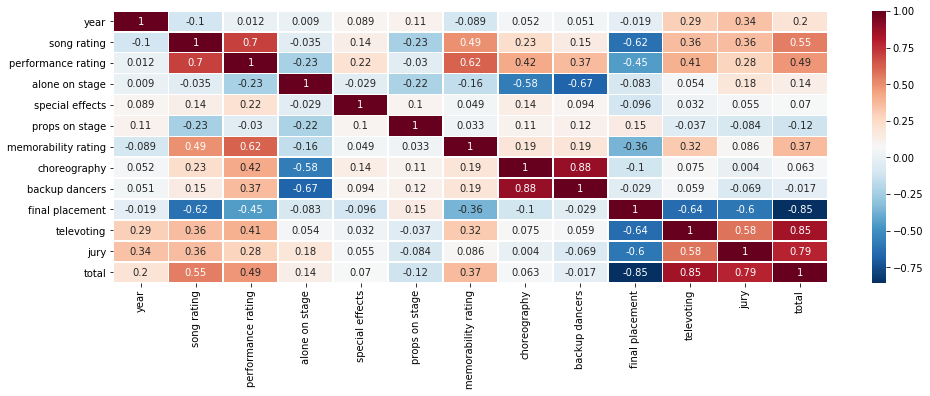

In [3]:
import seaborn as sb 
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
sb.heatmap(pearson_corr, 
            xticklabels=pearson_corr.columns,
            yticklabels=pearson_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,)

Here we can see which attributes have a strong correlation with each other. As we're going to be predicting the total number of points for the performance (without using jury points and televoting points), we will use the 3 attributes which have the strongest correlation with the total points, which are: song rating, performance rating and memorability rating.

In [4]:
from csv import DictReader
import numpy
import copy
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics


year_2015 = {}
year_2016 = {}
year_2017 = {}
year_2018 = {}
year_2019 = {}

reader = DictReader(open('performers.csv', 'rt', encoding='utf-8'))
for row in reader:
    year = row["year"]
    country = row["country"]
    performer = row["name of performer"]
    song_title = row["song title"]
    sdg = row["solo, duo or group"]
    song_rating = int(row["song rating"])
    performance_rating = int(row["performance rating"])
    memorability_rating = int(row["memorability rating"])
    genre = row["song genre"].strip()
    alone = row["alone on stage"]
    special_effects = row["special effects"]
    props = row["props on stage"]
    choreography = row["choreography"]
    backup_dancers =row["backup dancers"]
    total_points = int(row["total"])
    
    if int(year) == 2015:
        year_2015[country] = song_rating, performance_rating, memorability_rating, total_points
    elif int(year) == 2016:
        year_2016[country] = song_rating, performance_rating, memorability_rating, total_points
    elif int(year) == 2017:
        year_2017[country] = song_rating, performance_rating, memorability_rating, total_points
    elif int(year) == 2018:
        year_2018[country] = song_rating, performance_rating, memorability_rating, total_points
    else:
        year_2019[country] = song_rating, performance_rating, memorability_rating, total_points

## 2015

In [5]:
df = pd.DataFrame([{"Song rating": song_rating, "Performance rating": performance_rating, "Memorability rating": memorability_rating, "Total points": total_points} for song_rating, performance_rating, memorability_rating, total_points in year_2015.values()])
df.index = year_2015.keys()
df

,Song rating,Performance rating,Memorability rating,Total points
Slovenia,3,2,2,39
France,2,2,2,4
Israel,5,4,3,97
Estonia,4,2,2,106
United Kingdom,1,3,1,5
Armenia,3,2,1,34
Lithuania,2,3,3,30
Serbia,4,4,2,53
Norway,2,1,1,102
Sweden,5,5,5,365


In [6]:
abs_errors = []
for country in year_2015:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    c = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        c += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors.append(c / 5)
#print(sum(abs_errors) / len(abs_errors))

In [7]:
abs_errors_ridge = []
for country in year_2015:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    c = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = Ridge(alpha=0.3)
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        c += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors_ridge.append(c / 5)
#print(sum(abs_errors_ridge) / len(abs_errors_ridge))

In [8]:
abs_errors_lasso = []
for country in year_2015:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    count = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = Lasso(alpha=0.2)
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        count += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors_lasso.append(count / 5)
#print(sum(abs_errors_lasso) / len(abs_errors_lasso))

In [9]:
print("Mean absolute error, Lasso: ")
print(sum(abs_errors_lasso)/len(abs_errors_lasso))
print("Mean absolute error, Ridge:")
print(sum(abs_errors_ridge)/len(abs_errors_ridge))
print("Mean absolute error, Linear regression:")
print(sum(abs_errors)/len(abs_errors))

Mean absolute error, Lasso: 
67.56514285335642
Mean absolute error, Ridge:
68.18150883056963
Mean absolute error, Linear regression:
68.0829240345471


## 2016

In [10]:
df = pd.DataFrame([{"Song rating": song_rating, "Performance rating": performance_rating, "Memorability rating": memorability_rating, "Total points": total_points} for song_rating, performance_rating, memorability_rating, total_points in year_2016.values()])
df.index = year_2016.keys()
df

,Song rating,Performance rating,Memorability rating,Total points
Belgium,4,4,2,181
Chech Republic,2,1,1,46
Netherlands,2,1,1,153
Azerbaijan,3,2,1,117
Hungary,2,1,1,108
Italy,2,2,1,124
Israel,4,3,2,135
Bulgaria,5,4,3,307
Sweden,3,2,1,261
Germany,3,2,1,11


In [11]:
abs_errors = []
for country in year_2016:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    c = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        c += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors.append(c / 5)
#print(sum(abs_errors) / len(abs_errors))

In [12]:
abs_errors_ridge = []
for country in year_2016:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    c = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = Ridge(alpha=0.3)
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        c += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors_ridge.append(c / 5)
#print(sum(abs_errors_ridge) / len(abs_errors_ridge))

In [13]:
abs_errors_lasso = []
for country in year_2016:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    count = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = Lasso(alpha=0.2)
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        count += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors_lasso.append(count / 5)
#print(sum(abs_errors_lasso) / len(abs_errors_lasso))

In [14]:
print("Mean absolute error, Lasso: ")
print(sum(abs_errors_lasso)/len(abs_errors_lasso))
print("Mean absolute error, Ridge:")
print(sum(abs_errors_ridge)/len(abs_errors_ridge))
print("Mean absolute error, Linear regression:")
print(sum(abs_errors)/len(abs_errors))

Mean absolute error, Lasso: 
95.29317112309435
Mean absolute error, Ridge:
101.18207699508085
Mean absolute error, Linear regression:
98.71589798803561


## 2017

In [15]:
df = pd.DataFrame([{"Song rating": song_rating, "Performance rating": performance_rating, "Memorability rating": memorability_rating, "Total points": total_points} for song_rating, performance_rating, memorability_rating, total_points in year_2017.values()])
df.index = year_2017.keys()
df

,Song rating,Performance rating,Memorability rating,Total points
Israel,3,2,2,39
Poland,2,2,1,64
Belarus,3,3,2,83
Austria,2,2,1,93
Armenia,2,2,2,79
Netherlands,3,2,1,150
Moldova,4,4,3,374
Hungary,4,4,3,200
Italy,5,4,3,334
Denmark,4,2,1,77


In [16]:
abs_errors = []
for country in year_2017:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    c = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        c += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors.append(c / 5)
#print(sum(abs_errors) / len(abs_errors))

In [17]:
abs_errors_ridge = []
for country in year_2017:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    c = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = Ridge(alpha=0.3)
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        c += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors_ridge.append(c / 5)
#print(sum(abs_errors_ridge) / len(abs_errors_ridge))

In [18]:
abs_errors_lasso = []
for country in year_2017:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    count = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = Lasso(alpha=0.2)
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        count += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors_lasso.append(count / 5)
#print(sum(abs_errors_lasso) / len(abs_errors_lasso))

In [19]:
print("Mean absolute error, Lasso: ")
print(sum(abs_errors_lasso)/len(abs_errors_lasso))
print("Mean absolute error, Ridge:")
print(sum(abs_errors_ridge)/len(abs_errors_ridge))
print("Mean absolute error, Linear regression:")
print(sum(abs_errors)/len(abs_errors))

Mean absolute error, Lasso: 
120.26963458504179
Mean absolute error, Ridge:
114.01253793103788
Mean absolute error, Linear regression:
114.85001276577053


## 2018

In [20]:
df = pd.DataFrame([{"Song rating": song_rating, "Performance rating": performance_rating, "Memorability rating": memorability_rating, "Total points": total_points} for song_rating, performance_rating, memorability_rating, total_points in year_2018.values()])
df.index = year_2018.keys()
df

,Song rating,Performance rating,Memorability rating,Total points
Ukraine,3,3,4,130
Spain,2,1,1,61
Slovenia,2,2,2,64
Lithuania,2,1,1,181
Austria,3,2,1,342
Estonia,3,2,2,245
Norway,2,2,2,144
Portugal,2,2,2,39
United Kingdom,2,2,2,48
Serbia,4,4,3,113


In [21]:
abs_errors = []
for country in year_2018:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    c = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        c += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors.append(c / 5)
#print(sum(abs_errors) / len(abs_errors))

In [22]:
abs_errors_ridge = []
for country in year_2018:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    c = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = Ridge(alpha=0.3)
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        c += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors_ridge.append(c / 5)
#print(sum(abs_errors_ridge) / len(abs_errors_ridge))

In [23]:
abs_errors_lasso = []
for country in year_2018:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    count = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = Lasso(alpha=0.2)
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        count += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors_lasso.append(count / 5)
#print(sum(abs_errors_lasso) / len(abs_errors_lasso))

In [24]:
print("Mean absolute error, Lasso: ")
print(sum(abs_errors_lasso)/len(abs_errors_lasso))
print("Mean absolute error, Ridge:")
print(sum(abs_errors_ridge)/len(abs_errors_ridge))
print("Mean absolute error, Linear regression:")
print(sum(abs_errors)/len(abs_errors))

Mean absolute error, Lasso: 
91.6686273225222
Mean absolute error, Ridge:
91.74612167115541
Mean absolute error, Linear regression:
89.12950611908747


## 2019

In [25]:
df = pd.DataFrame([{"Song rating": song_rating, "Performance rating": performance_rating, "Memorability rating": memorability_rating, "Total points": total_points} for song_rating, performance_rating, memorability_rating, total_points in year_2019.values()])
df.index = year_2019.keys()
df

,Song rating,Performance rating,Memorability rating,Total points
Malta,4,3,2,107
Albania,3,3,1,90
Czech Republic,3,2,1,157
Germany,2,2,1,24
Russia,3,2,1,370
Denmark,3,2,1,120
San Marino,2,2,1,77
North Macedonia,5,5,3,305
Sweden,4,3,1,334
Slovenia,2,1,2,105


In [26]:
abs_errors = []
for country in year_2019:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    c = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        c += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors.append(c / 5)
#print(sum(abs_errors) / len(abs_errors))

In [27]:
abs_errors_ridge = []
for country in year_2019:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    c = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = Ridge(alpha=0.3)
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        c += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors_ridge.append(c / 5)
#print(sum(abs_errors_ridge) / len(abs_errors_ridge))

In [28]:
abs_errors_lasso = []
for country in year_2019:
    X = df.drop('Total points', axis=1)
    y = df['Total points']
    count = 0
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        regressor = Lasso(alpha=0.2)
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        count += metrics.mean_absolute_error(y_test, y_pred)
    abs_errors_lasso.append(count / 5)
#print(sum(abs_errors_lasso) / len(abs_errors_lasso))

In [29]:
print("Mean absolute error, Lasso: ")
print(sum(abs_errors_lasso)/len(abs_errors_lasso))
print("Mean absolute error, Ridge:")
print(sum(abs_errors_ridge)/len(abs_errors_ridge))
print("Mean absolute error, Linear regression:")
print(sum(abs_errors)/len(abs_errors))

Mean absolute error, Lasso: 
120.08015136901238
Mean absolute error, Ridge:
117.6032355132073
Mean absolute error, Linear regression:
126.67223162262478
